In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
batch_size = 128
learning_rate = 0.0002
latent_dim = 100  # Size of random noise vector
epochs = 50


Load MNIST Dataset

In [2]:
# Transformations: Convert to tensor & normalize between -1 and 1
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load MNIST dataset
dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


100%|██████████| 9.91M/9.91M [00:01<00:00, 6.06MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 161kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.30MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.01MB/s]


Define the Generator

In [3]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 784),  # 28x28 images
            nn.Tanh()  # Output between -1 and 1
        )

    def forward(self, z):
        return self.model(z).view(-1, 1, 28, 28)  # Reshape to (batch_size, 1, 28, 28)

# Initialize generator
generator = Generator().to(device)


Define the Discriminator

In [4]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()  # Probability of being real
        )

    def forward(self, img):
        return self.model(img.view(-1, 784))  # Flatten the image

# Initialize discriminator
discriminator = Discriminator().to(device)


In [5]:
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer_G = optim.Adam(generator.parameters(), lr=learning_rate, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=learning_rate, betas=(0.5, 0.999))


Training Loop

Epoch [0/50] Batch 0/469 | D Loss: 1.4634 | G Loss: 0.6908
Epoch [0/50] Batch 200/469 | D Loss: 1.0734 | G Loss: 1.2075
Epoch [0/50] Batch 400/469 | D Loss: 0.5618 | G Loss: 2.4139


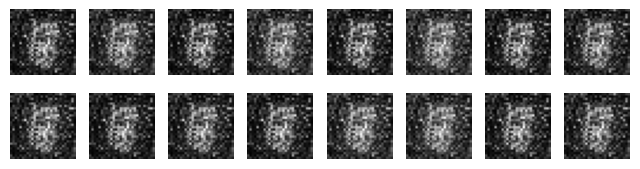

Epoch [1/50] Batch 0/469 | D Loss: 0.4948 | G Loss: 1.6099
Epoch [1/50] Batch 200/469 | D Loss: 0.3502 | G Loss: 3.5428
Epoch [1/50] Batch 400/469 | D Loss: 0.5991 | G Loss: 4.3338


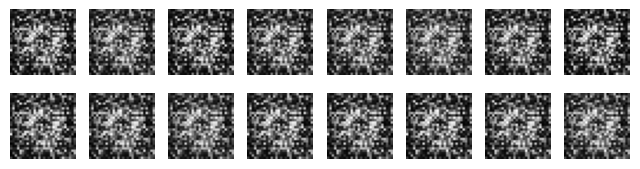

Epoch [2/50] Batch 0/469 | D Loss: 0.2143 | G Loss: 4.3233
Epoch [2/50] Batch 200/469 | D Loss: 0.6813 | G Loss: 5.1637
Epoch [2/50] Batch 400/469 | D Loss: 0.8124 | G Loss: 4.7911


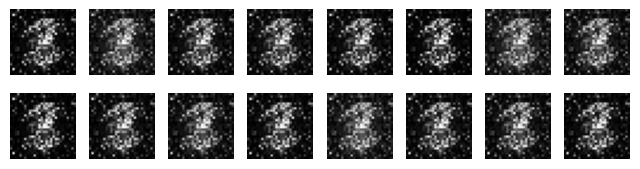

Epoch [3/50] Batch 0/469 | D Loss: 0.2250 | G Loss: 3.5254
Epoch [3/50] Batch 200/469 | D Loss: 0.0590 | G Loss: 4.3811
Epoch [3/50] Batch 400/469 | D Loss: 0.3915 | G Loss: 0.9914


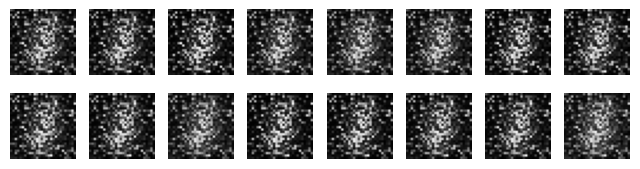

Epoch [4/50] Batch 0/469 | D Loss: 0.2327 | G Loss: 2.8297
Epoch [4/50] Batch 200/469 | D Loss: 0.3721 | G Loss: 6.0914
Epoch [4/50] Batch 400/469 | D Loss: 0.3416 | G Loss: 5.8691


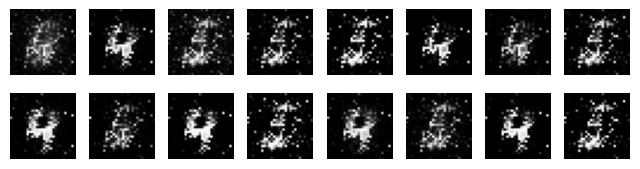

Epoch [5/50] Batch 0/469 | D Loss: 0.3248 | G Loss: 2.3568
Epoch [5/50] Batch 200/469 | D Loss: 0.5108 | G Loss: 2.2827
Epoch [5/50] Batch 400/469 | D Loss: 0.1341 | G Loss: 4.2982


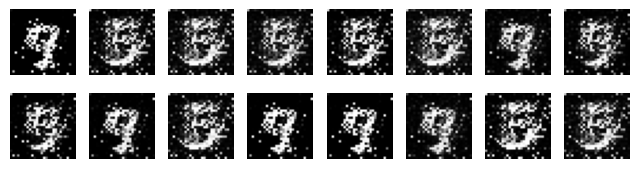

Epoch [6/50] Batch 0/469 | D Loss: 0.2401 | G Loss: 4.8397
Epoch [6/50] Batch 200/469 | D Loss: 0.1720 | G Loss: 4.1492
Epoch [6/50] Batch 400/469 | D Loss: 0.0781 | G Loss: 4.3504


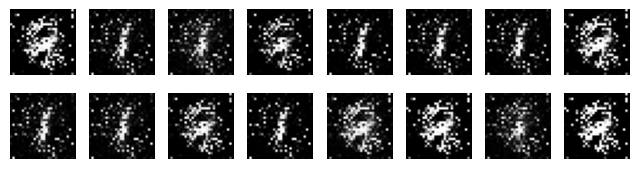

Epoch [7/50] Batch 0/469 | D Loss: 0.2168 | G Loss: 4.0933
Epoch [7/50] Batch 200/469 | D Loss: 0.3052 | G Loss: 3.0353
Epoch [7/50] Batch 400/469 | D Loss: 0.2534 | G Loss: 2.4797


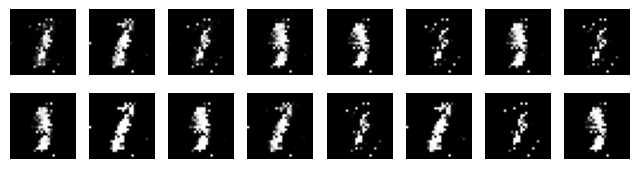

Epoch [8/50] Batch 0/469 | D Loss: 0.1620 | G Loss: 3.4002
Epoch [8/50] Batch 200/469 | D Loss: 0.2030 | G Loss: 3.7588
Epoch [8/50] Batch 400/469 | D Loss: 0.0189 | G Loss: 5.8034


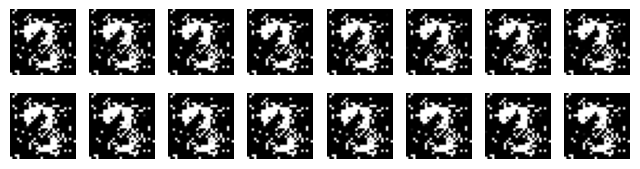

Epoch [9/50] Batch 0/469 | D Loss: 0.0038 | G Loss: 6.6194
Epoch [9/50] Batch 200/469 | D Loss: 0.0003 | G Loss: 8.5206
Epoch [9/50] Batch 400/469 | D Loss: 0.0003 | G Loss: 8.3030


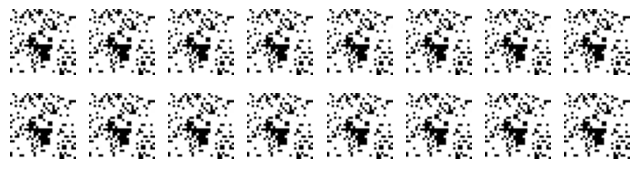

Epoch [10/50] Batch 0/469 | D Loss: 0.0002 | G Loss: 8.8093
Epoch [10/50] Batch 200/469 | D Loss: 0.0000 | G Loss: 10.0651
Epoch [10/50] Batch 400/469 | D Loss: 0.0001 | G Loss: 9.6139


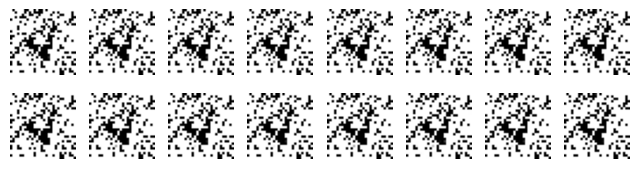

Epoch [11/50] Batch 0/469 | D Loss: 0.0002 | G Loss: 8.6477
Epoch [11/50] Batch 200/469 | D Loss: 0.0001 | G Loss: 39.7057
Epoch [11/50] Batch 400/469 | D Loss: 0.0020 | G Loss: 7.3659


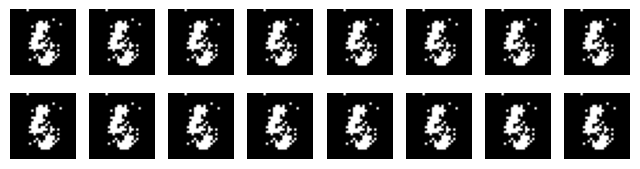

Epoch [12/50] Batch 0/469 | D Loss: 0.0003 | G Loss: 7.9682
Epoch [12/50] Batch 200/469 | D Loss: 0.0005 | G Loss: 7.0577
Epoch [12/50] Batch 400/469 | D Loss: 0.0002 | G Loss: 8.4485


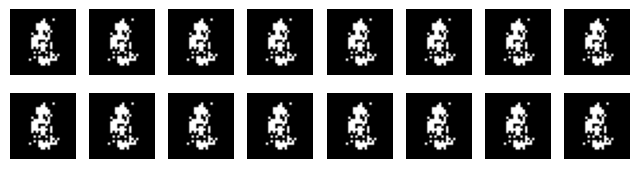

Epoch [13/50] Batch 0/469 | D Loss: 0.0074 | G Loss: 8.2495
Epoch [13/50] Batch 200/469 | D Loss: 0.0002 | G Loss: 8.9411
Epoch [13/50] Batch 400/469 | D Loss: 0.0003 | G Loss: 8.9248


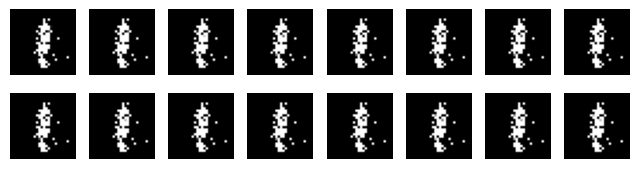

Epoch [14/50] Batch 0/469 | D Loss: 0.0160 | G Loss: 10.5847
Epoch [14/50] Batch 200/469 | D Loss: 100.0000 | G Loss: 0.0000
Epoch [14/50] Batch 400/469 | D Loss: 100.0000 | G Loss: 0.0000


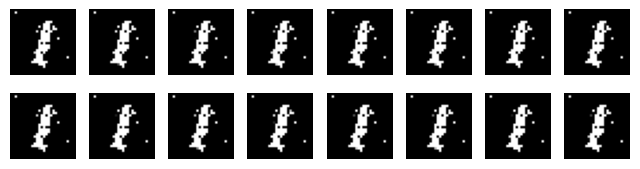

Epoch [15/50] Batch 0/469 | D Loss: 100.0000 | G Loss: 0.0000
Epoch [15/50] Batch 200/469 | D Loss: 100.0000 | G Loss: 0.0000
Epoch [15/50] Batch 400/469 | D Loss: 100.0000 | G Loss: 0.0000


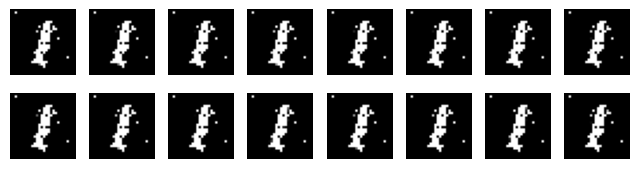

Epoch [16/50] Batch 0/469 | D Loss: 100.0000 | G Loss: 0.0000
Epoch [16/50] Batch 200/469 | D Loss: 100.0000 | G Loss: 0.0000
Epoch [16/50] Batch 400/469 | D Loss: 100.0000 | G Loss: 0.0000


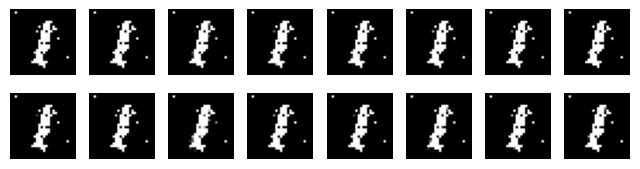

Epoch [17/50] Batch 0/469 | D Loss: 100.0000 | G Loss: 0.0000
Epoch [17/50] Batch 200/469 | D Loss: 100.0000 | G Loss: 0.0000
Epoch [17/50] Batch 400/469 | D Loss: 100.0000 | G Loss: 0.0000


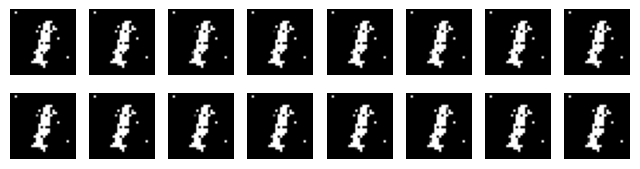

Epoch [18/50] Batch 0/469 | D Loss: 100.0000 | G Loss: 0.0000
Epoch [18/50] Batch 200/469 | D Loss: 100.0000 | G Loss: 0.0000
Epoch [18/50] Batch 400/469 | D Loss: 100.0000 | G Loss: 0.0000


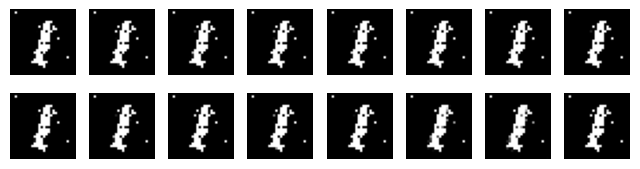

Epoch [19/50] Batch 0/469 | D Loss: 100.0000 | G Loss: 0.0000
Epoch [19/50] Batch 200/469 | D Loss: 100.0000 | G Loss: 0.0000
Epoch [19/50] Batch 400/469 | D Loss: 100.0000 | G Loss: 0.0000


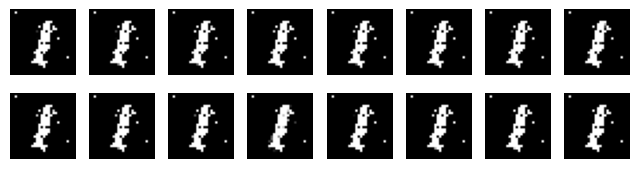

Epoch [20/50] Batch 0/469 | D Loss: 100.0000 | G Loss: 0.0000
Epoch [20/50] Batch 200/469 | D Loss: 100.0000 | G Loss: 0.0000
Epoch [20/50] Batch 400/469 | D Loss: 100.0000 | G Loss: 0.0000


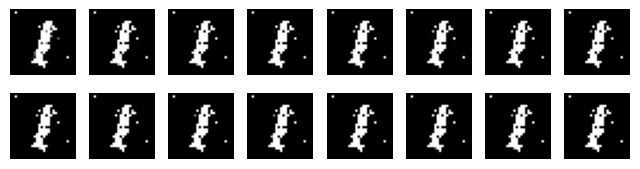

Epoch [21/50] Batch 0/469 | D Loss: 100.0000 | G Loss: 0.0000
Epoch [21/50] Batch 200/469 | D Loss: 100.0000 | G Loss: 0.0000
Epoch [21/50] Batch 400/469 | D Loss: 100.0000 | G Loss: 0.0000


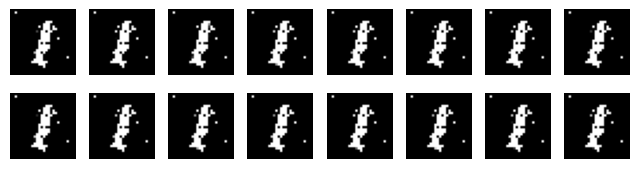

Epoch [22/50] Batch 0/469 | D Loss: 100.0000 | G Loss: 0.0000
Epoch [22/50] Batch 200/469 | D Loss: 100.0000 | G Loss: 0.0000
Epoch [22/50] Batch 400/469 | D Loss: 100.0000 | G Loss: 0.0000


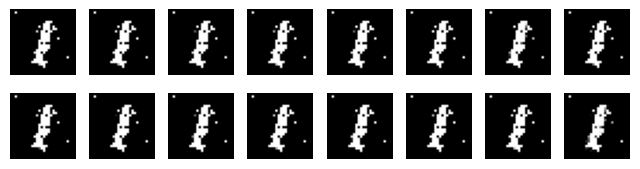

Epoch [23/50] Batch 0/469 | D Loss: 100.0000 | G Loss: 0.0000
Epoch [23/50] Batch 200/469 | D Loss: 100.0000 | G Loss: 0.0000
Epoch [23/50] Batch 400/469 | D Loss: 100.0000 | G Loss: 0.0000


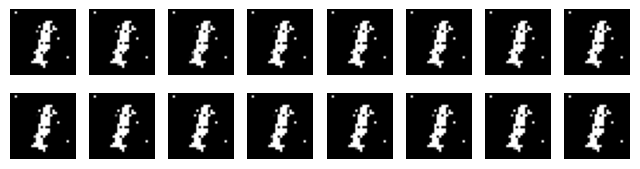

Epoch [24/50] Batch 0/469 | D Loss: 100.0000 | G Loss: 0.0000
Epoch [24/50] Batch 200/469 | D Loss: 100.0000 | G Loss: 0.0000
Epoch [24/50] Batch 400/469 | D Loss: 100.0000 | G Loss: 0.0000


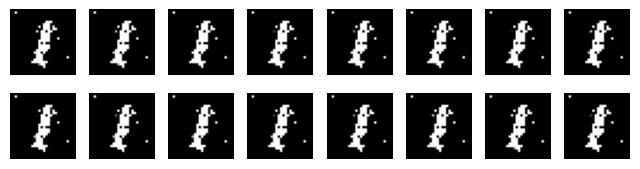

Epoch [25/50] Batch 0/469 | D Loss: 100.0000 | G Loss: 0.0000
Epoch [25/50] Batch 200/469 | D Loss: 100.0000 | G Loss: 0.0000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

for epoch in range(epochs):
    for i, (real_images, _) in enumerate(dataloader):
        real_images = real_images.to(device)
        batch_size = real_images.size(0)

        # Generate random noise and create fake images
        z = torch.randn(batch_size, latent_dim).to(device)
        fake_images = generator(z)

        # ---- Train Discriminator ----
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        real_loss = criterion(discriminator(real_images), real_labels)
        fake_loss = criterion(discriminator(fake_images.detach()), fake_labels)
        d_loss = real_loss + fake_loss

        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()

        # ---- Train Generator ----
        g_loss = criterion(discriminator(fake_images), real_labels)  # Fool D

        optimizer_G.zero_grad()
        g_loss.backward()
        optimizer_G.step()

        if i % 200 == 0:
            print(f"Epoch [{epoch}/{epochs}] Batch {i}/{len(dataloader)} | D Loss: {d_loss:.4f} | G Loss: {g_loss:.4f}")

    # Save generated images
    with torch.no_grad():
        test_z = torch.randn(16, latent_dim).to(device)
        generated = generator(test_z).cpu().numpy()
        fig, axes = plt.subplots(2, 8, figsize=(8, 2))
        for ax, img in zip(axes.flatten(), generated):
            ax.imshow(img.squeeze(), cmap="gray")
            ax.axis("off")
        plt.show()
